In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RNA_seq = pd.read_csv("../datasets/dataset_nRC.csv")
RNA_seq

,Label,Sequence,Length
0,5S_rRNA,GGATGCGATCATGTCTGCACTAACACACCGGATCCCATCAGAACTC...,119
1,5S_rRNA,GGGTGCGATCATACCAGCACTAATTCACCAGATCCCATCAGAACTC...,119
2,5S_rRNA,GCTTACGGCCACACCGCCTGGATCACGCCCGATCTCGTTTGATCTC...,119
3,5S_rRNA,AGCTACGGCCATATCACCCTGAACATGCCTGATCTCGTCTGATCTC...,119
4,5S_rRNA,GGTTGCGTTCATACCAACTCACATGCACCGGATCCCATCTGAACTC...,119
...,...,...,...
8915,IRES,ACTTCCAATGCAATGGCTGCAGTGAAGCTATAATTATAGCCTTGTA...,131
8916,IRES,ATTCCCAGTGCTGCACCGAGAGGACCTGTCTCCTGTGGACTGGAAG...,163
8917,IRES,AGTGCAACGGCTGCACCGAAGGCACAATCGTAGCCTTGTATTTCAC...,172
8918,IRES,ATTCCCGCTGCTGCACAGAGAGGACCCGTGTCCCGTGGACTGGGAG...,142


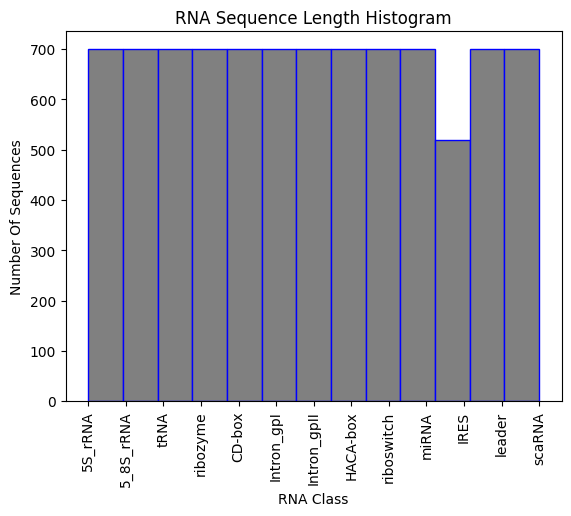

In [3]:
plt.hist(RNA_seq['Label'], bins=13, color="grey", ec="blue")
plt.xticks(rotation=90)
plt.gca().set(
    title='RNA Sequence Length Histogram', 
    xlabel='RNA Class',
    ylabel = 'Number Of Sequences');


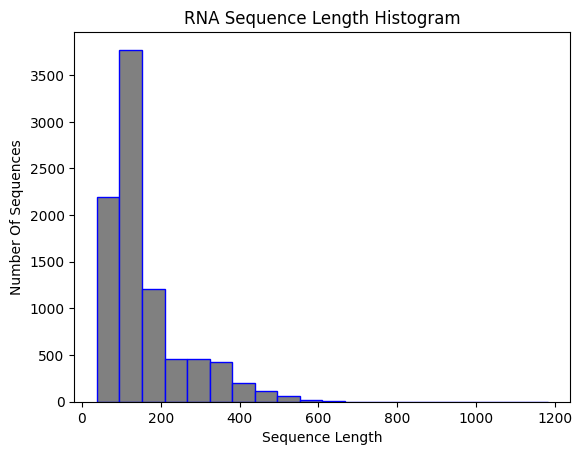

In [4]:
plt.hist(RNA_seq['Length'], bins=20, color="grey", ec="blue")
plt.gca().set(
    title='RNA Sequence Length Histogram', 
    xlabel='Sequence Length',
    ylabel = 'Number Of Sequences');

In [5]:
RNA_seq['Label'].value_counts()

5S_rRNA        700
5_8S_rRNA      700
tRNA           700
ribozyme       700
CD-box         700
Intron_gpI     700
Intron_gpII    700
HACA-box       700
riboswitch     700
miRNA          700
leader         700
scaRNA         700
IRES           520
Name: Label, dtype: int64

In [6]:
RNA_Classes = RNA_seq['Label'].unique()
print(RNA_Classes)


['5S_rRNA' '5_8S_rRNA' 'tRNA' 'ribozyme' 'CD-box' 'Intron_gpI'
 'Intron_gpII' 'HACA-box' 'riboswitch' 'miRNA' 'IRES' 'leader' 'scaRNA']


# RNA Number of Sequences per length per class

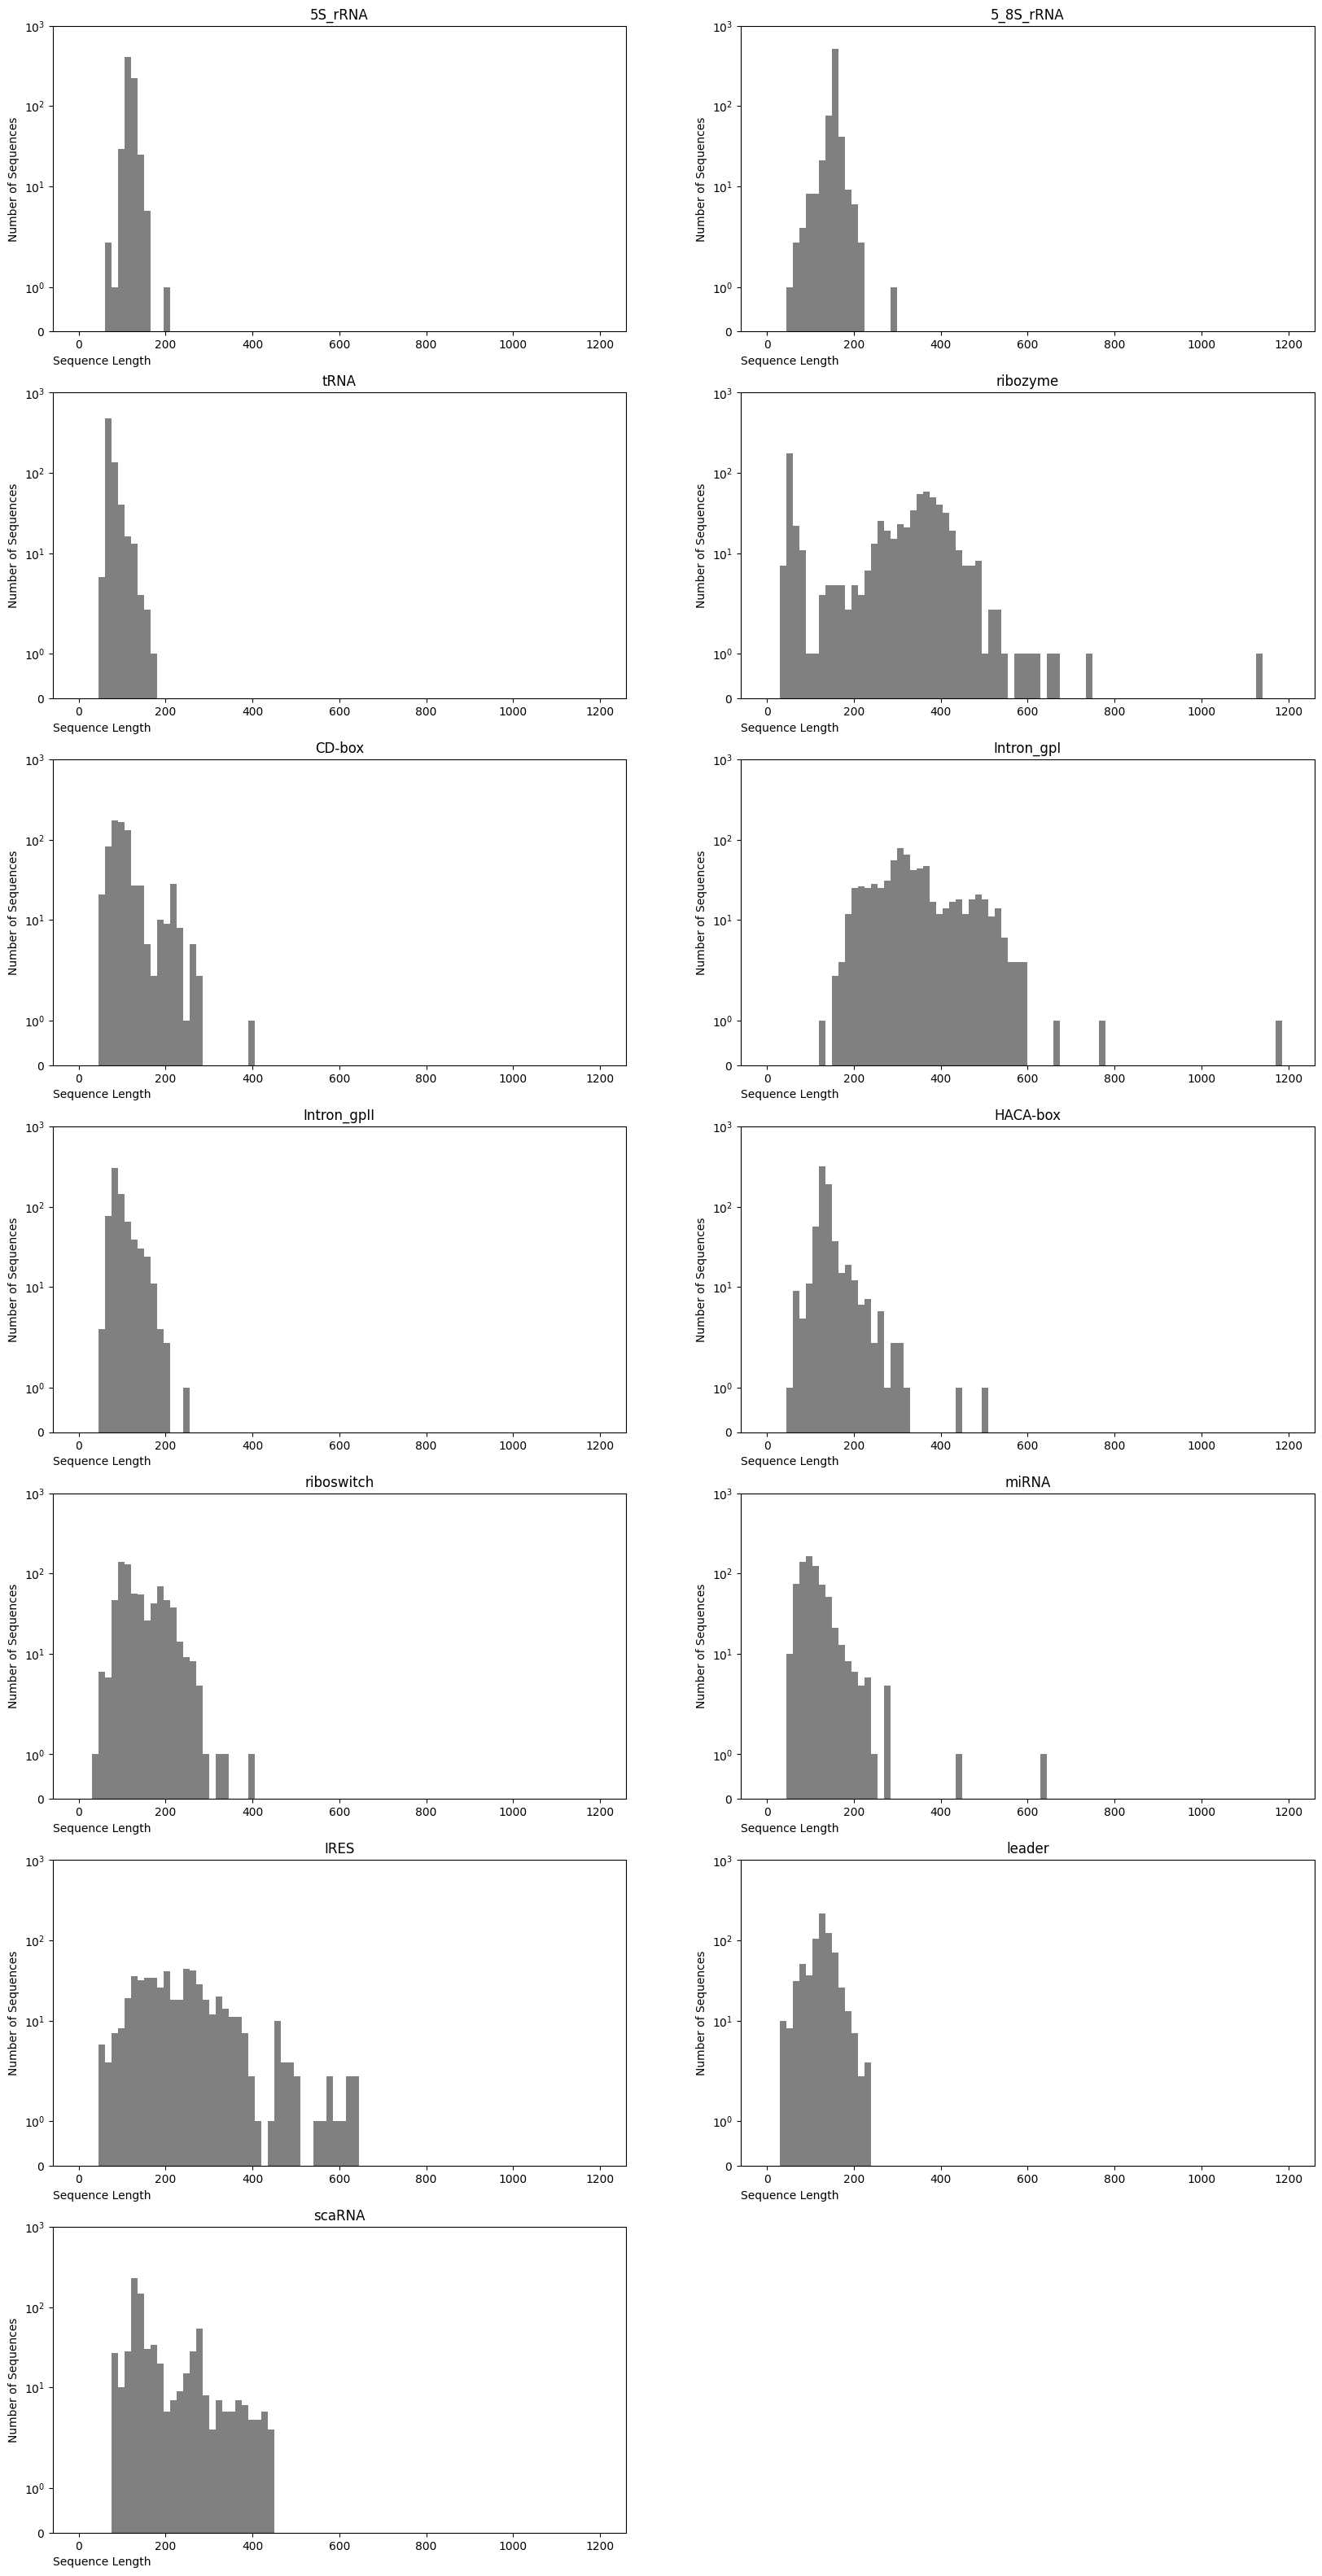

In [7]:
count = 0
fig, axs = plt.subplots(7,2,figsize=(20, 40))

for RNA_class in RNA_Classes:
    axs[int(count/2)][count%2].hist(RNA_seq.query('Label == @RNA_class')['Length'], bins=80, range=[0,1200], color="grey")
    axs[int(count/2)][count%2].set_title(RNA_class)
    count += 1

for ax in axs.flat:
    ax.set_ylabel('Number of Sequences')
    ax.set_xlabel('Sequence Length', loc='left')
    ax.set_ylim([0,1000])
    ax.set_yscale("symlog") # symmetric logarithmic scale
    


# Remove last plot
fig.delaxes(axs[6][1])


In [8]:
means = []
stds = []
for RNA_class in RNA_Classes:
    res = RNA_seq.query('Label == @RNA_class')['Length']
    means.append(int(res.mean().round(0)))
    stds.append(int(res.std().round(0)))

df_stats = pd.DataFrame(data={'RNA_Class':RNA_Classes,'Mean':means,'STD':stds})
df_stats



    

,RNA_Class,Mean,STD
0,5S_rRNA,119,9
1,5_8S_rRNA,153,15
2,tRNA,78,13
3,ribozyme,260,159
4,CD-box,106,42
5,Intron_gpI,342,99
6,Intron_gpII,96,26
7,HACA-box,140,35
8,riboswitch,142,50
9,miRNA,108,41


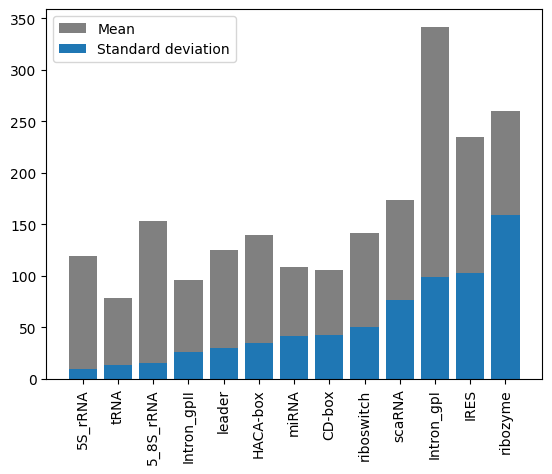

In [10]:

plt.xticks(rotation=90)
df_stats = df_stats.sort_values(by='STD')
plt.bar(df_stats['RNA_Class'],df_stats['Mean'],label = 'Mean',color = "grey")
plt.bar(df_stats['RNA_Class'],df_stats['STD'],label = 'Standard deviation')
plt.legend()
plt.show()
